# 树形图Tree diagram 
本文旨在描述如何使用Python实现基本的树形图。要实现这样的树形图，首先需要有一个数值矩阵。每一行代表一个实体（这里是一辆汽车）。每列都是描述汽车的变量。目标是将实体聚类以了解谁与谁有共同点。python下通过scipy中hierarchy.linkage进行聚类，hierarchy.dendrogram画树形图。参考文档：https://python-graph-gallery.com/dendrogram/   
该章节主要内容有：
1. 数据处理 data processing
2. 基础树形图 basic dendrogram
3. 自定义树形图 customised dendrogram
4. 彩色树形图标签 color dendrogram labels  


## 1. 数据处理 data processing  
画树形图，往往第一列是数据实体名字，即物体种类。其他列分别为物体变量。

In [1]:
# 导入库
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

# Import the mtcars dataset from the web + keep only numeric variables
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [2]:
# 通常获得数据表格需要将车名设置行标题，这里model代表车的类型
df = df.set_index('model')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [3]:
# 同时需要删除行标索引的标题名
del df.index.name
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## 2. 基础树形图 basic dendrogram

In [4]:
# 执行分层聚类
Z = hierarchy.linkage(df, 'ward')
# 函数原型如下：
# scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
# y输入矩阵，method聚类方法，metric距离计算方法。通常ward比较靠谱
# optimal_ordering重新排序链接矩阵，以使连续叶之间的距离最小，这样树形结构更为直观，但是计算速度变慢。
# 参数选择见：https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

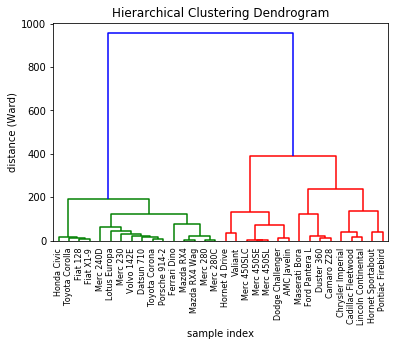

In [5]:
# Make the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# 画聚类图，常用参数labels设定横坐标下标，leaf_rotation标题旋转
# 详细使用见：https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
hierarchy.dendrogram(Z, labels=df.index, leaf_rotation=90);

## 3. 自定义树形图 customised dendrogram  
+ 叶标签 leaf label
+ 聚类簇数 number of clusters
+ 颜色 color
+ 截减 truncate
+ 方向 orientation

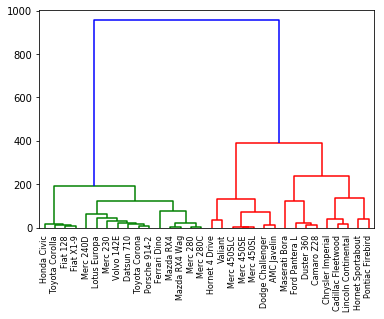

In [6]:
# 叶标签 leaf label
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
 
# Plot with Custom leaves
# 常用参数labels设定横坐标下标，leaf_rotation标题旋转，leaf_font_size设置字号
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index);

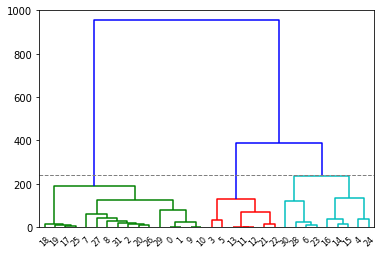

In [7]:
# 聚类簇数 number of clusters
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
 
# Control number of clusters in the plot + add horizontal line.
# color_threshold设定颜色阈值，小于olor_threshold根据簇节点为一簇
hierarchy.dendrogram(Z, color_threshold=240)
# 画水平线，y纵坐标，c颜色，lw线条粗细，linestyle线形
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed');

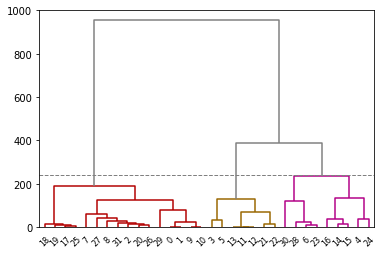

In [8]:
# 颜色 color
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

# Set the colour of the cluster here: 设置聚类颜色
hierarchy.set_link_color_palette(['#b30000','#996600', '#b30086'])
 
# Make the dendrogram and give the colour above threshold
# above_threshold_color设置color_threshold上方链接的颜色
hierarchy.dendrogram(Z, color_threshold=240, above_threshold_color='grey')
 
# Add horizontal line.
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed');

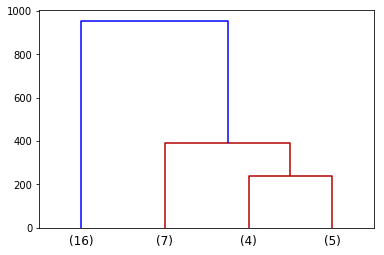

In [9]:
# 截减 truncate
# 原始观察矩阵很大时，树形图很难读取。截断用于压缩树形图。有几种模式：
# 1 None 不执行截断
# 2 lastp lastp设置叶子节点数，最底层节点数
# 3 level 根据level设置图中层最大数
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
  
# method 1: lastp
# you will have 4 leaf at the bottom of the plot  
hierarchy.dendrogram(Z, truncate_mode = 'lastp', p=4);

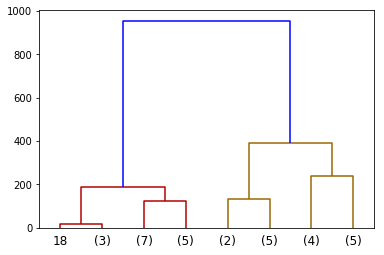

In [10]:
# method 2: level
# No more than ``p`` levels of the dendrogram tree are displayed.
hierarchy.dendrogram(Z, truncate_mode = 'level', p=2);

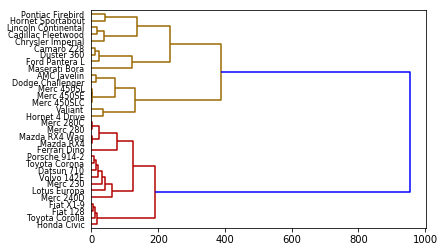

In [11]:
# 方向 orientation

# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
 
# Orientation of the dendrogram
# 设置层次树的朝向，orientation可选"top", "left", "bottom", "right"，默认top
hierarchy.dendrogram(Z, orientation="right", labels=df.index);

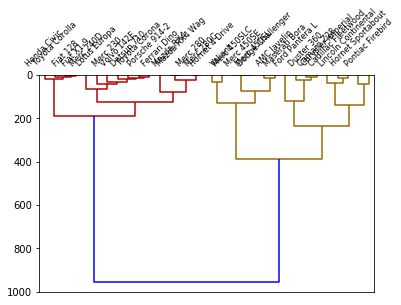

In [12]:
# Orientation of the dendrogram
hierarchy.dendrogram(Z, orientation="bottom", labels=df.index);

## 4. 彩色树形图标签 color dendrogram labels

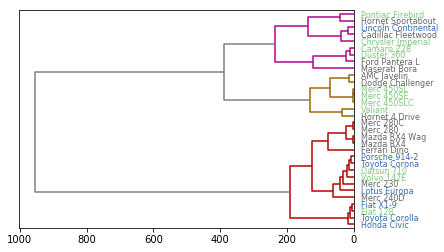

In [13]:
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

# Make the dendro
# 画树状图
hierarchy.dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey')

# Create a color palette with 3 color for the 3 cyl possibilities
# 设置渐变颜色，共三种颜色
my_palette = plt.cm.get_cmap("Accent", 3)

# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
# 根据cyl设置颜色参数，对参数进行分类
df['cyl']=pd.Categorical(df['cyl'])
# 获得每种汽车cyl对应的颜色
my_color=df['cyl'].cat.codes

# Apply the right color to each label
ax = plt.gca()
# 获得y轴坐标标签
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    # 设置颜色
    lbl.set_color(my_palette(val))